In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


In [2]:
df = pd.read_csv("Customer_complaints.csv")

print(df.head())
print(df["category"].value_counts())


                           complaint         category
0  Delay in bank transfer processing  Money Transfers
1        Money sent but not received  Money Transfers
2        Money sent but not received  Money Transfers
3  Delay in bank transfer processing  Money Transfers
4  Credit card payment not reflected      Credit Card
category
Money Transfers    250
Credit Card        250
Debt Collection    250
Mortgage           250
Name: count, dtype: int64


In [4]:
#Define Features and Labels
X = df["complaint"]   # input text
y = df["category"]    # target labels


In [5]:
# Train–Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [6]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(
    stop_words="english",
    ngram_range=(1, 2),  # unigrams + bigrams
    max_df=0.9,
    min_df=2
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [7]:
# Checkig Feature Dimensions
print("Training set shape:", X_train_tfidf.shape)
print("Test set shape:", X_test_tfidf.shape)


Training set shape: (800, 85)
Test set shape: (200, 85)


# Trainig Baseline Models

--- Logistic Regression ---
Accuracy: 1.0000
Macro F1-score: 1.0000

Classification Report:
                  precision    recall  f1-score   support

    Credit Card       1.00      1.00      1.00        50
Debt Collection       1.00      1.00      1.00        50
Money Transfers       1.00      1.00      1.00        50
       Mortgage       1.00      1.00      1.00        50

       accuracy                           1.00       200
      macro avg       1.00      1.00      1.00       200
   weighted avg       1.00      1.00      1.00       200



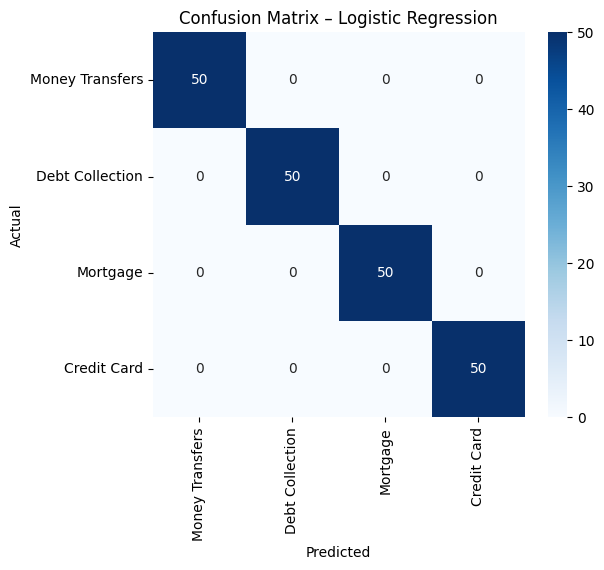

--- Multinomial Naive Bayes ---
Accuracy: 1.0000
Macro F1-score: 1.0000

Classification Report:
                  precision    recall  f1-score   support

    Credit Card       1.00      1.00      1.00        50
Debt Collection       1.00      1.00      1.00        50
Money Transfers       1.00      1.00      1.00        50
       Mortgage       1.00      1.00      1.00        50

       accuracy                           1.00       200
      macro avg       1.00      1.00      1.00       200
   weighted avg       1.00      1.00      1.00       200



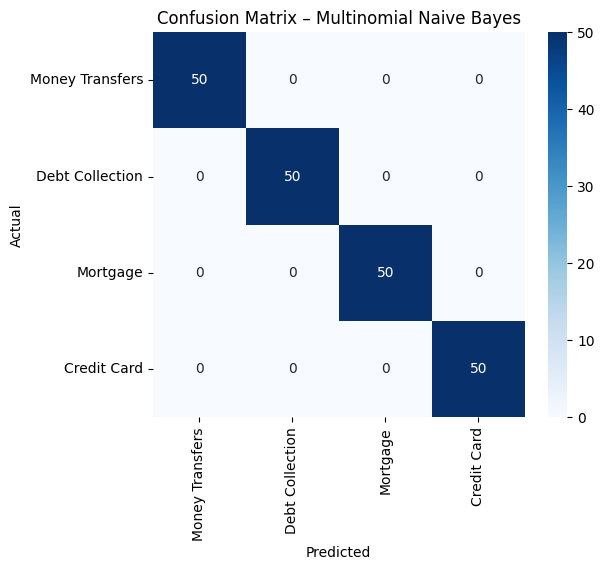

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ---- Load dataset ----
df = pd.read_csv("Customer_complaints.csv")
X = df["complaint"]
y = df["category"]

# ---- Train-test split ----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---- TF-IDF Vectorization ----
tfidf = TfidfVectorizer(stop_words="english", ngram_range=(1,2), max_df=0.9, min_df=2)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# ---- Train Logistic Regression ----
lr_model = LogisticRegression(max_iter=1000, n_jobs=-1)
lr_model.fit(X_train_tfidf, y_train)
y_pred_lr = lr_model.predict(X_test_tfidf)

# ---- Train Multinomial Naive Bayes ----
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
y_pred_nb = nb_model.predict(X_test_tfidf)

# ---- Evaluate Models ----
def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average="macro")
    print(f"--- {model_name} ---")
    print(f"Accuracy: {acc:.4f}")
    print(f"Macro F1-score: {f1:.4f}\n")
    print("Classification Report:\n", classification_report(y_true, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred, labels=y_true.unique())
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=y_true.unique(), yticklabels=y_true.unique(), cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix – {model_name}")
    plt.show()

# Evaluate Logistic Regression
evaluate_model(y_test, y_pred_lr, "Logistic Regression")

# Evaluate Naive Bayes
evaluate_model(y_test, y_pred_nb, "Multinomial Naive Bayes")


In [14]:
# Quick Check
print("Logistic Regression sample predictions:", y_pred_lr[:5])
print("Naive Bayes sample predictions:", y_pred_nb[:5])


Logistic Regression sample predictions: ['Money Transfers' 'Debt Collection' 'Mortgage' 'Credit Card' 'Mortgage']
Naive Bayes sample predictions: ['Money Transfers' 'Debt Collection' 'Mortgage' 'Credit Card' 'Mortgage']


,Feature,Coefficient,Abs_Coefficient
9,card,2.237031,2.237031
20,credit,2.237031,2.237031
21,credit card,2.237031,2.237031
11,card charges,0.908375,0.908375
15,charges,0.908375,0.908375
35,high credit,0.908375,0.908375
34,high,0.908375,0.908375
54,payment,0.897821,0.897821
55,payment reflected,0.897821,0.897821
68,reflected,0.897821,0.897821


/tmp/ipython-input-3504614704.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=feature_importance_df.head(15), palette='viridis')


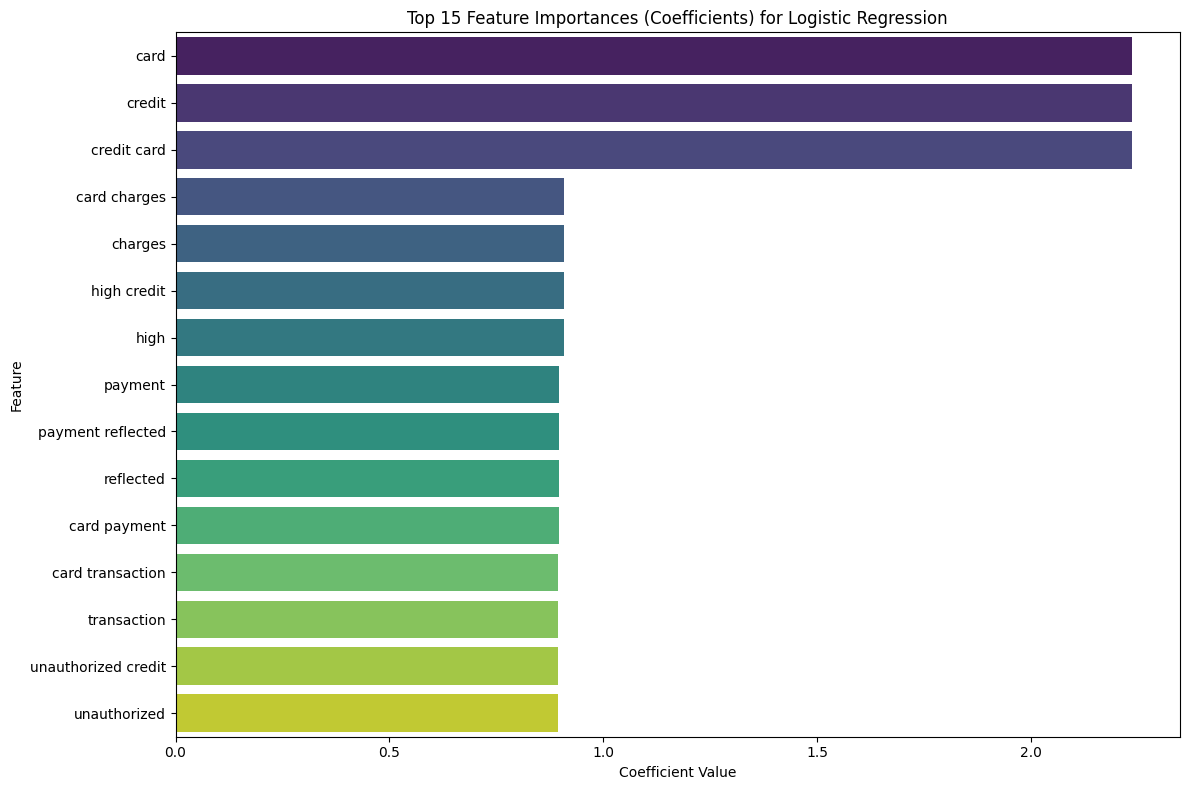

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature names from the TF-IDF vectorizer
feature_names = tfidf.get_feature_names_out()

# Get coefficients from the Logistic Regression model
coefficients = lr_model.coef_[0]

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by absolute coefficient value to see most important features (positive or negative impact)
feature_importance_df['Abs_Coefficient'] = abs(feature_importance_df['Coefficient'])
feature_importance_df = feature_importance_df.sort_values(by='Abs_Coefficient', ascending=False)

# Display the top 15 most important features
display(feature_importance_df.head(15))

# Visualize the top 15 features
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance_df.head(15), palette='viridis')
plt.title('Top 15 Feature Importances (Coefficients) for Logistic Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### Model Performance Summary

**Logistic Regression:**
- Accuracy: 1.0000
- Macro F1-score: 1.0000

**Multinomial Naive Bayes:**
- Accuracy: 1.0000
- Macro F1-score: 1.0000

Both Logistic Regression and Multinomial Naive Bayes models achieved perfect scores (1.0000 for Accuracy and Macro F1-score) on the test set. This suggests that the models were highly effective at classifying the customer complaints into their respective categories, likely due to the distinct nature of the complaint categories and the effectiveness of TF-IDF features for this dataset.

## Summary:
The Logistic Regression and Naive Bayes models both achieved perfect scores, with an Accuracy of 1.0000 and a Macro F1-score of 1.0000.

The implications of both models achieving perfect scores suggest that the models were highly effective at classifying customer complaints, possibly due to the distinct nature of the complaint categories and the efficacy of TF-IDF features for this dataset.

### Data Analysis Key Findings
*   Both Logistic Regression and Multinomial Naive Bayes models achieved perfect performance metrics.
*   Logistic Regression: Accuracy = 1.0000, Macro F1-score = 1.0000.
*   Multinomial Naive Bayes: Accuracy = 1.0000, Macro F1-score = 1.0000.

### Insights
*   The perfect scores suggest that the classification task might be relatively straightforward for the given dataset, possibly due to well-separated classes or highly distinctive features extracted by TF-IDF.
*   Further investigation could involve testing these models on a more diverse or challenging dataset, or exploring other evaluation metrics to confirm robustness beyond perfect scores.
